In [31]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [6]:
x_train = pd.read_csv('../datasets/clusterization/X_dataset.csv')

In [20]:
# Definindo os parâmetros
cluster_range = range(2, 11)  # Número de clusters variando de 2 a 10
silhouette_scores = []  # Lista para armazenar os scores

Clusters: 2, Silhouette Score: 0.213219480988304
Clusters: 3, Silhouette Score: 0.23295918228054466
Clusters: 4, Silhouette Score: 0.21636012588246262
Clusters: 5, Silhouette Score: 0.18816562257236502
Clusters: 6, Silhouette Score: 0.2050075341900723
Clusters: 7, Silhouette Score: 0.19917016044869704
Clusters: 8, Silhouette Score: 0.18358668432368103
Clusters: 9, Silhouette Score: 0.16896704142861357
Clusters: 10, Silhouette Score: 0.1850644795307821
Melhor número de clusters: 3, Melhor Silhouette Score: 0.23295918228054466


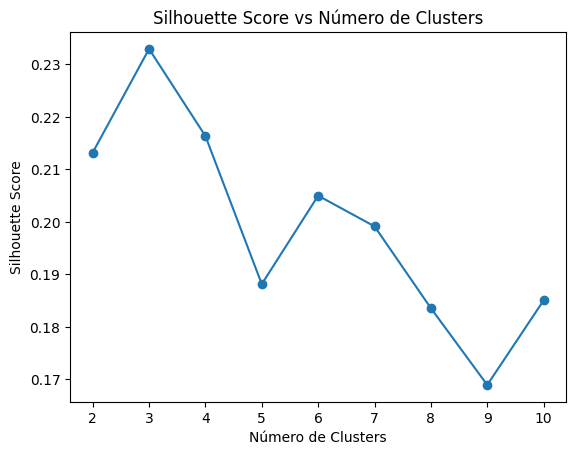

In [23]:
# Loop pelos diferentes valores de clusters
for n_clusters in cluster_range:
    kmeans = ct.KMeans(n_clusters=n_clusters, init='random', n_init=10, random_state=2)
    kmeans.fit(x_train)
    labels = kmeans.predict(x_train)
    
    # Calcula o silhouette score para cada número de clusters
    score = silhouette_score(x_train, labels)
    silhouette_scores.append(score)
    print(f"Clusters: {n_clusters}, Silhouette Score: {score}")

# Encontrando o melhor número de clusters com base no Silhouette Score
best_n_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Melhor número de clusters: {best_n_clusters}, Melhor Silhouette Score: {max(silhouette_scores)}")

# Plotar os resultados
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Número de Clusters')
plt.show()

In [29]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Lista para armazenar os scores e o número de clusters
preferences = np.linspace(-500, -10, 20)  # Variação dos valores de preference
silhouette_scores = []
n_clusters_list = []

# Loop para testar diferentes valores de preference
for preference in preferences:
    aff_prop = AffinityPropagation(preference=preference, random_state=2)
    aff_prop.fit(x_train)
    labels = aff_prop.predict(x_train)
    
    # Calcula o Silhouette Score
    score = silhouette_score(x_train, labels)
    silhouette_scores.append(score)
    
    # Número de clusters encontrados
    n_clusters = len(set(labels))
    n_clusters_list.append(n_clusters)
    
    print(f"Preference: {preference}, Silhouette Score: {score}, Clusters: {n_clusters}")

# Melhor configuração
best_preference = preferences[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)
best_n_clusters = n_clusters_list[silhouette_scores.index(max(silhouette_scores))]

print(f"\nMelhor Preference: {best_preference}, Melhor Silhouette Score: {best_score}, Clusters: {best_n_clusters}")

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(preferences, silhouette_scores, marker='o')
plt.xlabel('Preference')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Preference (Affinity Propagation)')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(preferences, n_clusters_list, marker='o', color='red')
plt.xlabel('Preference')
plt.ylabel('Número de Clusters')
plt.title('Número de Clusters vs Preference (Affinity Propagation)')
plt.show()


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [33]:
# Lista para armazenar os scores e o número de clusters
preferences = np.linspace(-500, -10, 20)  # Variação dos valores de preference
silhouette_scores = []
n_clusters_list = []



Preference: -500.0, Silhouette Score: -1, Clusters: 1
Preference: -474.2105263157895, Silhouette Score: 0.17617333436147645, Clusters: 2
Preference: -448.42105263157896, Silhouette Score: 0.17617333436147645, Clusters: 2
Preference: -422.63157894736844, Silhouette Score: 0.17617333436147645, Clusters: 2
Preference: -396.8421052631579, Silhouette Score: 0.17617333436147645, Clusters: 2
Preference: -371.0526315789474, Silhouette Score: 0.17617333436147645, Clusters: 2
Preference: -345.2631578947368, Silhouette Score: -1, Clusters: 1
Preference: -319.4736842105263, Silhouette Score: -1, Clusters: 1
Preference: -293.6842105263158, Silhouette Score: 0.17617333436147645, Clusters: 2
Preference: -267.89473684210526, Silhouette Score: 0.17617333436147645, Clusters: 2
Preference: -242.10526315789474, Silhouette Score: 0.2151230623181698, Clusters: 3
Preference: -216.31578947368422, Silhouette Score: 0.2151230623181698, Clusters: 3
Preference: -190.52631578947364, Silhouette Score: 0.19885971205

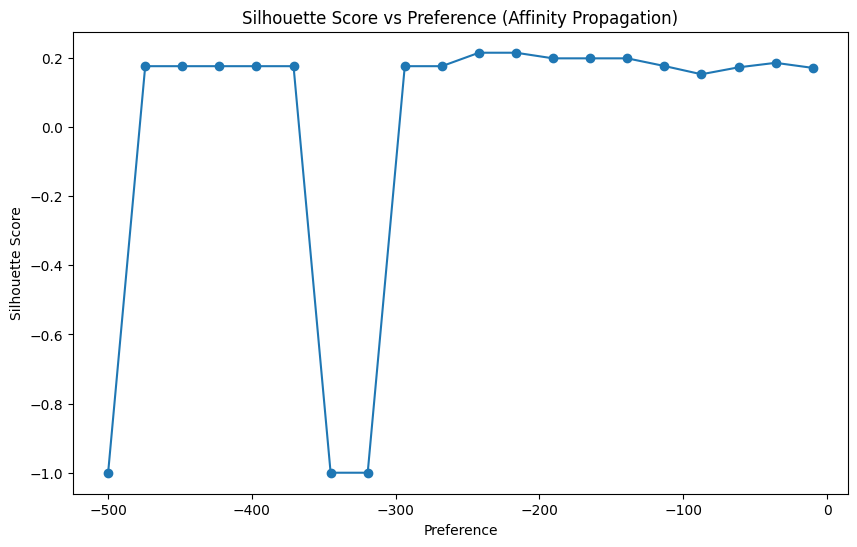

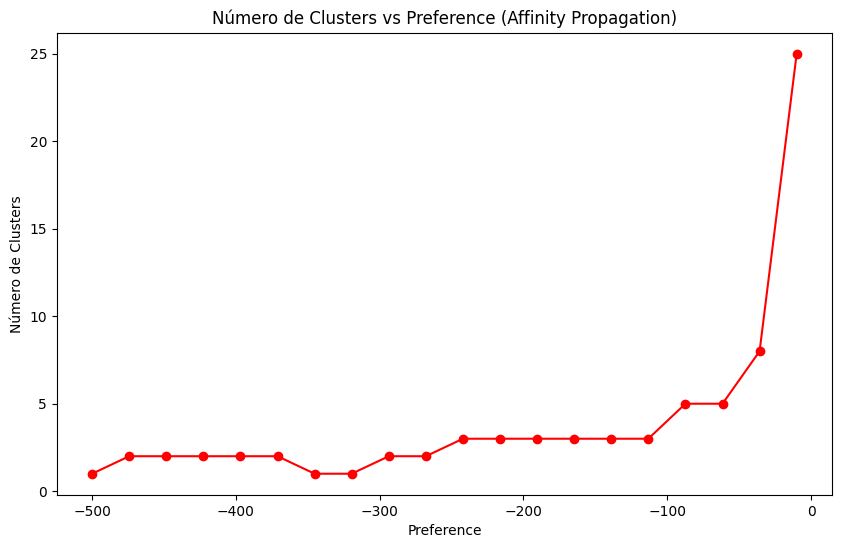

In [35]:
# Lista para armazenar os scores e o número de clusters
preferences = np.linspace(-500, -10, 20)  # Variação dos valores de preference
silhouette_scores = []
n_clusters_list = []

# Loop para testar diferentes valores de preference
for preference in preferences:
    aff_prop = AffinityPropagation(preference=preference, random_state=2)
    aff_prop.fit(x_train)
    labels = aff_prop.predict(x_train)
    
    # Número de clusters encontrados
    n_clusters = len(set(labels))
    n_clusters_list.append(n_clusters)
    
    # Verifica se o número de clusters é maior que 1 para calcular o Silhouette Score
    if n_clusters > 1:
        score = silhouette_score(x_train, labels)
    else:
        score = -1  # Atribui um valor de score negativo para casos inválidos
    silhouette_scores.append(score)
    
    print(f"Preference: {preference}, Silhouette Score: {score}, Clusters: {n_clusters}")

# Melhor configuração
best_preference = preferences[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)
best_n_clusters = n_clusters_list[silhouette_scores.index(max(silhouette_scores))]

print(f"\nMelhor Preference: {best_preference}, Melhor Silhouette Score: {best_score}, Clusters: {best_n_clusters}")

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(preferences, silhouette_scores, marker='o')
plt.xlabel('Preference')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Preference (Affinity Propagation)')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(preferences, n_clusters_list, marker='o', color='red')
plt.xlabel('Preference')
plt.ylabel('Número de Clusters')
plt.title('Número de Clusters vs Preference (Affinity Propagation)')
plt.show()